In [27]:
import numpy as np # manip des arrays (tableaux)
import pandas as pd # manip des dataframes
import matplotlib.pyplot as plt # construct des graphes : barplot, cammenberts
import seaborn as sns

# 1. Exploration des données

## 1.1. Importation des données de train et de test

In [28]:
# train data
train_original_df = pd.read_csv("data_csv/train.csv")
train_original_df = train_original_df.drop(['id'], axis=1) # supprimer la colonne 'id' du train_original_df
train_original_df.head()
#train_original_df.describe()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [29]:
# Import data
test_original_df = pd.read_csv("data_csv/test.csv")
test_original_df = test_original_df.drop(['id'], axis=1) # supprimer la colonne 'id' du test_original_df

In [30]:
# Affichage des premiers lignes
test_original_df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [31]:
# Affichage des dernieres lignes
test_original_df.tail()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
127032,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56
127033,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165
127034,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74
127035,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265
127036,Male,41,1,29.0,1,1-2 Year,No,27927.0,124.0,231


In [32]:
# Vérifier si on a des valeur null dans notre csv
test_original_df.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [33]:
# Description de nos données
test_original_df.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
count,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000
mean,38.765903,0.998134,26.459866,0.460039,30524.643576,111.800468,154.318301
std,15.465814,0.043152,13.209916,0.498403,16945.297103,54.371765,83.661588
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
25%,25.000000,1.000000,15.000000,0.000000,24325.000000,26.000000,82.000000
50%,36.000000,1.000000,28.000000,0.000000,31642.000000,135.000000,154.000000
75%,49.000000,1.000000,35.000000,1.000000,39408.000000,152.000000,227.000000
max,85.000000,1.000000,52.000000,1.000000,472042.000000,163.000000,299.000000


## 1.2. Les statistiques des données (Repésentation graphique)

<AxesSubplot:title={'center':'test Gender'}, xlabel='Gender'>

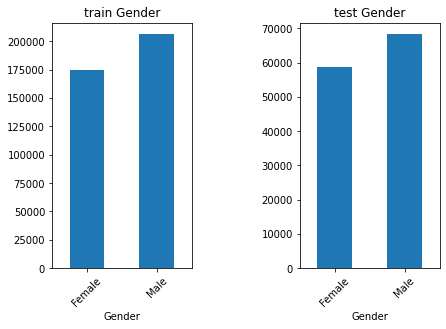

In [34]:
# La colonne 'Gender'
origin_train_gender_graph = train_original_df.groupby(['Gender'])['Gender'].count()
origin_test_gender_graph = test_original_df.groupby(['Gender'])['Gender'].count()
plt.subplot(121)
plt.tight_layout(w_pad=10.0)
origin_train_gender_graph.plot(kind = 'bar', rot=45, title="train Gender")
plt.subplot(122)
origin_test_gender_graph.plot(kind = 'bar', rot=45, title="test Gender")

<AxesSubplot:title={'center':'test Vehicle_Age'}, xlabel='Vehicle_Age'>

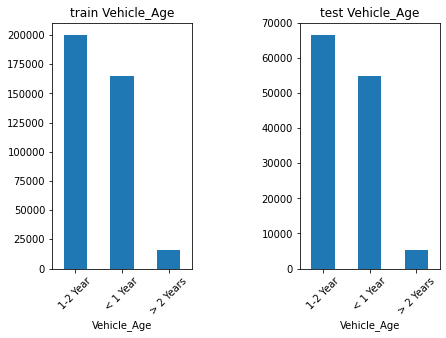

In [35]:
# La colonne 'Vehicle_Age'
origin_train_vehicleAge_graph = train_original_df.groupby(['Vehicle_Age'])['Vehicle_Age'].count()
origin_test_vehicleAge_graph = test_original_df.groupby(['Vehicle_Age'])['Vehicle_Age'].count()
plt.subplot(121)
plt.tight_layout(w_pad=10.0)
origin_train_vehicleAge_graph.plot(kind = 'bar', rot=45, title="train Vehicle_Age")
plt.subplot(122)
origin_test_vehicleAge_graph.plot(kind = 'bar', rot=45, title="test Vehicle_Age")

# Encodage des données du string en numérique

In [36]:
train_encoded_df = train_original_df
test_encoded_df = test_original_df

In [37]:
from sklearn.preprocessing import scale, LabelEncoder
def toEncodeData(df, colomn):
    le = LabelEncoder()
    le.fit(df[colomn])
    print(le.classes_)
    df[colomn] = le.transform(df[colomn])

In [38]:
# Encoder la colonne 'Gender'
toEncodeData(train_encoded_df, 'Gender')
toEncodeData(test_encoded_df, 'Gender')

['Female' 'Male']
['Female' 'Male']


In [39]:
# Encoder la colonne 'Gender'
toEncodeData(train_encoded_df, 'Vehicle_Age')
toEncodeData(test_encoded_df, 'Vehicle_Age')

['1-2 Year' '< 1 Year' '> 2 Years']
['1-2 Year' '< 1 Year' '> 2 Years']


In [40]:
# Encoder la colonne 'Vehicle_Damage'
toEncodeData(train_encoded_df, 'Vehicle_Damage')
toEncodeData(test_encoded_df, 'Vehicle_Damage')

['No' 'Yes']
['No' 'Yes']


In [41]:
#train_encoded_df.head()
test_encoded_df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,25,1,11.0,1,1,0,35786.0,152.0,53
1,1,40,1,28.0,0,0,1,33762.0,7.0,111
2,1,47,1,28.0,0,0,1,40050.0,124.0,199
3,1,24,1,27.0,1,1,1,37356.0,152.0,187
4,1,27,1,28.0,1,1,0,59097.0,152.0,297


## Entraîner un model de classification

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
# initialiser notre model
model = KNeighborsClassifier()

In [44]:
""" pour entrainer un model, il faut qu'on aura 2 tableuax numpy,
    mais dans notre dataset on 'a q'un seul tableau pendas ==> donc on doit creer les 2 tableau numpy telque:
    Y: représente la colonne 'Response'
    X: représente le reste (toute les colonnes sauf 'Response') 
    *** X, Y ne sont pas des tableaux numpy, sont des dataframes, sachant que pendas est construit sur la base de numpy
        donc on passe ces 2 tableau à 'scikit-learn' et tous va bien se passé ***
"""

" pour entrainer un model, il faut qu'on aura 2 tableuax numpy,\n    mais dans notre dataset on 'a q'un seul tableau pendas ==> donc on doit creer les 2 tableau numpy telque:\n    Y: représente la colonne 'Response'\n    X: représente le reste (toute les colonnes sauf 'Response') \n    *** X, Y ne sont pas des tableaux numpy, sont des dataframes, sachant que pendas est construit sur la base de numpy\n        donc on passe ces 2 tableau à 'scikit-learn' et tous va bien se passé ***\n"

In [51]:
# préparer les tableau X et Y
y = train_encoded_df['Response']
X = train_encoded_df.drop('Response', axis=1).to_numpy() # eliminer la colonne 'Response'

array([[1.0000e+00, 4.4000e+01, 1.0000e+00, ..., 4.0454e+04, 2.6000e+01,
        2.1700e+02],
       [1.0000e+00, 7.6000e+01, 1.0000e+00, ..., 3.3536e+04, 2.6000e+01,
        1.8300e+02],
       [1.0000e+00, 4.7000e+01, 1.0000e+00, ..., 3.8294e+04, 2.6000e+01,
        2.7000e+01],
       ...,
       [1.0000e+00, 2.1000e+01, 1.0000e+00, ..., 3.5118e+04, 1.6000e+02,
        1.6100e+02],
       [0.0000e+00, 6.8000e+01, 1.0000e+00, ..., 4.4617e+04, 1.2400e+02,
        7.4000e+01],
       [1.0000e+00, 4.6000e+01, 1.0000e+00, ..., 4.1777e+04, 2.6000e+01,
        2.3700e+02]])

### Entraîner notre model

In [52]:
model.fit(X, y)

KNeighborsClassifier()

### Évaluer la performance de notre model

In [53]:
model.score(X, y)

### Prédiction

In [ ]:

def interested(gender, age, driving_license, region_code, previously_insured, vehicle_age, vehicle_damage, annual_premium, policy_sales_channel, vintage):
    x_predict = np.array([
        gender, age, driving_license, region_code, previously_insured, vehicle_age, vehicle_damage, annual_premium, policy_sales_channel, vintage
    ]).reshape(1, 10)
    predictClass = model.predict(x_predict) # pédicri à quelle classe (intérissé ou non)
    probaPredict = model.predict_proba(x_predict) # la probabilité d'être intérissé ou non
    return (predictClass, probaPredict)

In [ ]:
test_encoded_df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,25,1,11.0,1,1,0,35786.0,152.0,53
1,1,40,1,28.0,0,0,1,33762.0,7.0,111
2,1,47,1,28.0,0,0,1,40050.0,124.0,199
3,1,24,1,27.0,1,1,1,37356.0,152.0,187
4,1,27,1,28.0,1,1,0,59097.0,152.0,297


In [ ]:
print(interested(1, 25, 1, 11.0, 1, 1, 1, 35786.0, 152.0, 53))

(array([0]), array([[1., 0.]]))
